## Data Processing

#### SMOTENC
Synthetic Minority Over-sampling Technique for Nominal (categorical) and Continuous (numeric) features.

Creates synthetic samples 
- Handles continuous features by interpolating between minority class samples ("Bad" client)
- Handle categorical features by sampling. (NOT interpolation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_data = pd.read_csv("../data/Vivian/cleaned_data.csv")
cleaned_data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,FLAG_MOBIL,OCCUPATION_TYPE,NO_RISK_MONTHS,LOW_RISK_MONTHS,MEDIUM_RISK_MONTHS,HIGH_RISK_MONTHS,CRITICAL_RISK_MONTHS,AGE_YEARS,YEARS_EMPLOYED,CREDIT_APPROVAL
0,5008804,1,1,427500.0,Working,Rented apartment,1,NaN,14,1,1,0,0,32,12,1
1,5008805,1,1,427500.0,Working,Rented apartment,1,NaN,13,1,1,0,0,32,12,1
2,5008806,1,1,112500.0,Working,House,1,Security staff,23,7,0,0,0,58,3,1
3,5008808,0,1,270000.0,Commercial associate,House,1,Sales staff,3,2,0,0,0,52,8,1
4,5008809,0,1,270000.0,Commercial associate,House,1,Sales staff,5,0,0,0,0,52,8,1


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

In [4]:
X = cleaned_data.drop(columns = ["CREDIT_APPROVAL"])
y = cleaned_data["CREDIT_APPROVAL"]

In [5]:
# Split the data before applying SMOTE 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

In [6]:
X_train_encoded = X_train.copy()

# Need to encode original columns and create new _ENCODED columns
for col in ["NAME_INCOME_TYPE", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]:
    label_encoder = LabelEncoder()
    X_train_encoded[col + "_ENCODED"] = label_encoder.fit_transform(X_train_encoded[col].astype(str))
X_train_encoded

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,FLAG_MOBIL,OCCUPATION_TYPE,NO_RISK_MONTHS,LOW_RISK_MONTHS,MEDIUM_RISK_MONTHS,HIGH_RISK_MONTHS,CRITICAL_RISK_MONTHS,AGE_YEARS,YEARS_EMPLOYED,NAME_INCOME_TYPE_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
14387,5058343,0,1,63000.0,Working,House,1,High skill tech staff,9,3,0,0,0,54,4,4,1,6
19868,5088456,1,1,225000.0,Commercial associate,House,1,Drivers,7,1,0,0,0,41,11,0,1,4
5515,5028238,1,1,292500.0,State servant,House,1,NaN,0,13,1,0,0,44,6,2,1,18
6710,5029751,0,1,202500.0,Working,House,1,Drivers,0,10,2,0,0,49,5,4,1,4
33269,5142366,1,1,112500.0,Working,House,1,Drivers,8,1,0,0,0,44,2,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16067,5065567,0,0,135000.0,Working,House,1,Sales staff,2,9,0,0,0,37,0,4,1,14
10976,5046231,0,1,112500.0,Pensioner,House,1,NaN,4,3,0,0,0,62,0,1,1,18
28831,5116714,0,0,135000.0,Commercial associate,Municipal apartment,1,NaN,5,11,0,0,0,52,1,0,2,18
11308,5047764,0,0,135000.0,Commercial associate,House,1,Cooking staff,26,13,0,0,0,43,0,0,1,2


In [7]:
# Show the number encoded for each categories for the categorical variable 
for col in ["NAME_INCOME_TYPE", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]:
    print(f"\nMapping for {col}:")
    mapping = X_train_encoded[[col, col + "_ENCODED"]].drop_duplicates().sort_values(col + "_ENCODED")
    print(mapping.to_string(index = False))


Mapping for NAME_INCOME_TYPE:
    NAME_INCOME_TYPE  NAME_INCOME_TYPE_ENCODED
Commercial associate                         0
           Pensioner                         1
       State servant                         2
             Student                         3
             Working                         4

Mapping for NAME_HOUSING_TYPE:
  NAME_HOUSING_TYPE  NAME_HOUSING_TYPE_ENCODED
    Co-op apartment                          0
              House                          1
Municipal apartment                          2
   Office apartment                          3
   Rented apartment                          4
       With parents                          5

Mapping for OCCUPATION_TYPE:
      OCCUPATION_TYPE  OCCUPATION_TYPE_ENCODED
          Accountants                        0
       Cleaning staff                        1
        Cooking staff                        2
           Core staff                        3
              Drivers                        4
             H

In [8]:
# Drop the str column for categorical variables ready for SMOTENC
X_train_encoded_smotenc = X_train_encoded.drop(["NAME_INCOME_TYPE", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"], axis=1).copy().reset_index(drop = True)
X_train_encoded_smotenc

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,NO_RISK_MONTHS,LOW_RISK_MONTHS,MEDIUM_RISK_MONTHS,HIGH_RISK_MONTHS,CRITICAL_RISK_MONTHS,AGE_YEARS,YEARS_EMPLOYED,NAME_INCOME_TYPE_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED
0,5058343,0,1,63000.0,1,9,3,0,0,0,54,4,4,1,6
1,5088456,1,1,225000.0,1,7,1,0,0,0,41,11,0,1,4
2,5028238,1,1,292500.0,1,0,13,1,0,0,44,6,2,1,18
3,5029751,0,1,202500.0,1,0,10,2,0,0,49,5,4,1,4
4,5142366,1,1,112500.0,1,8,1,0,0,0,44,2,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5065567,0,0,135000.0,1,2,9,0,0,0,37,0,4,1,14
29161,5046231,0,1,112500.0,1,4,3,0,0,0,62,0,1,1,18
29162,5116714,0,0,135000.0,1,5,11,0,0,0,52,1,0,2,18
29163,5047764,0,0,135000.0,1,26,13,0,0,0,43,0,0,1,2


In [9]:
# Apply SMOTENC to training data ONLY
categorical_cols = ["NAME_INCOME_TYPE_ENCODED", "NAME_HOUSING_TYPE_ENCODED", "OCCUPATION_TYPE_ENCODED"]
categorical_cols_idx = [X_train_encoded_smotenc.columns.get_loc(col) for col in categorical_cols]

smote = SMOTENC(categorical_features = categorical_cols_idx, random_state = 42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_encoded_smotenc, y_train)

In [10]:
balanced_train = X_train_resample.copy()
balanced_train["CREDIT_APPROVAL"] = y_train_resample
balanced_train.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,NO_RISK_MONTHS,LOW_RISK_MONTHS,MEDIUM_RISK_MONTHS,HIGH_RISK_MONTHS,CRITICAL_RISK_MONTHS,AGE_YEARS,YEARS_EMPLOYED,NAME_INCOME_TYPE_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED,CREDIT_APPROVAL
0,5058343,0,1,63000.0,1,9,3,0,0,0,54,4,4,1,6,1
1,5088456,1,1,225000.0,1,7,1,0,0,0,41,11,0,1,4,1
2,5028238,1,1,292500.0,1,0,13,1,0,0,44,6,2,1,18,1
3,5029751,0,1,202500.0,1,0,10,2,0,0,49,5,4,1,4,1
4,5142366,1,1,112500.0,1,8,1,0,0,0,44,2,4,1,4,1


In [11]:
print(pd.Series(y_train_resample).value_counts())

CREDIT_APPROVAL
1    28183
0    28183
Name: count, dtype: int64


In [12]:
balanced_train["AMT_INCOME_TOTAL_THOUSANDS"] = balanced_train["AMT_INCOME_TOTAL"]/1000

# Exploratory Data Analysis

In [13]:
balanced_train.isnull().sum()

ID                            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
FLAG_MOBIL                    0
NO_RISK_MONTHS                0
LOW_RISK_MONTHS               0
MEDIUM_RISK_MONTHS            0
HIGH_RISK_MONTHS              0
CRITICAL_RISK_MONTHS          0
AGE_YEARS                     0
YEARS_EMPLOYED                0
NAME_INCOME_TYPE_ENCODED      0
NAME_HOUSING_TYPE_ENCODED     0
OCCUPATION_TYPE_ENCODED       0
CREDIT_APPROVAL               0
AMT_INCOME_TOTAL_THOUSANDS    0
dtype: int64

In [14]:
balanced_train

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,NO_RISK_MONTHS,LOW_RISK_MONTHS,MEDIUM_RISK_MONTHS,HIGH_RISK_MONTHS,CRITICAL_RISK_MONTHS,AGE_YEARS,YEARS_EMPLOYED,NAME_INCOME_TYPE_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED,CREDIT_APPROVAL,AMT_INCOME_TOTAL_THOUSANDS
0,5058343,0,1,63000.00000,1,9,3,0,0,0,54,4,4,1,6,1,63.00000
1,5088456,1,1,225000.00000,1,7,1,0,0,0,41,11,0,1,4,1,225.00000
2,5028238,1,1,292500.00000,1,0,13,1,0,0,44,6,2,1,18,1,292.50000
3,5029751,0,1,202500.00000,1,0,10,2,0,0,49,5,4,1,4,1,202.50000
4,5142366,1,1,112500.00000,1,8,1,0,0,0,44,2,4,1,4,1,112.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56361,5090050,0,1,157500.00000,1,20,19,3,0,0,39,4,4,1,8,0,157.50000
56362,5024766,0,0,270000.00000,1,0,13,9,0,0,33,5,4,1,6,0,270.00000
56363,5090697,0,1,129113.13017,1,19,5,5,0,7,54,1,0,1,18,0,129.11313
56364,5066481,0,0,121500.00000,1,5,9,8,0,0,37,2,1,1,18,0,121.50000


In [15]:
balanced_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56366 entries, 0 to 56365
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          56366 non-null  int64  
 1   FLAG_OWN_CAR                56366 non-null  int64  
 2   FLAG_OWN_REALTY             56366 non-null  int64  
 3   AMT_INCOME_TOTAL            56366 non-null  float64
 4   FLAG_MOBIL                  56366 non-null  int64  
 5   NO_RISK_MONTHS              56366 non-null  int64  
 6   LOW_RISK_MONTHS             56366 non-null  int64  
 7   MEDIUM_RISK_MONTHS          56366 non-null  int64  
 8   HIGH_RISK_MONTHS            56366 non-null  int64  
 9   CRITICAL_RISK_MONTHS        56366 non-null  int64  
 10  AGE_YEARS                   56366 non-null  int64  
 11  YEARS_EMPLOYED              56366 non-null  int64  
 12  NAME_INCOME_TYPE_ENCODED    56366 non-null  int64  
 13  NAME_HOUSING_TYPE_ENCODED   563

##### Credit Appproval vs. Own Car

In [16]:
credit_approval_by_car_ownership = balanced_train.groupby("FLAG_OWN_CAR")[["CREDIT_APPROVAL"]].mean()
credit_approval_by_car_ownership  
# Fraction of approvals among non-car owners (0) vs. car owners (1)

,CREDIT_APPROVAL
FLAG_OWN_CAR,
0,0.436863
1,0.653268


In [17]:
# Frequency table to see the proportions within each car ownership group
pd.crosstab(balanced_train["FLAG_OWN_CAR"],
            balanced_train["CREDIT_APPROVAL"],
            normalize = "index")

CREDIT_APPROVAL,0,1
FLAG_OWN_CAR,,
0,0.563137,0.436863
1,0.346732,0.653268


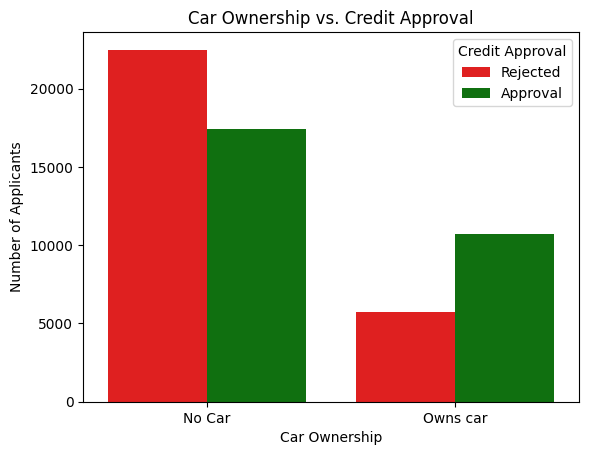

In [18]:
sns.countplot(x = "FLAG_OWN_CAR",
              hue = "CREDIT_APPROVAL",
              data = balanced_train,
              palette = {0: "red", 1: "green"})
plt.title("Car Ownership vs. Credit Approval")
plt.xlabel("Car Ownership")
plt.ylabel("Number of Applicants")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
plt.xticks([0, 1], ["No Car", "Owns car"])
plt.show()

#### Credit Approval vs. Owning a Property

In [19]:
credit_approval_by_property_ownership = balanced_train.groupby("FLAG_OWN_REALTY")[["CREDIT_APPROVAL"]].mean()
credit_approval_by_property_ownership 
# Fraction of approvals among non-property owners (0) vs. property owners (1)

,CREDIT_APPROVAL
FLAG_OWN_REALTY,
0,0.348692
1,0.633426


In [20]:
# Frequency table to see the proportions within each car ownership group
pd.crosstab(balanced_train["FLAG_OWN_REALTY"],
            balanced_train["CREDIT_APPROVAL"],
            normalize = "index")

CREDIT_APPROVAL,0,1
FLAG_OWN_REALTY,,
0,0.651308,0.348692
1,0.366574,0.633426


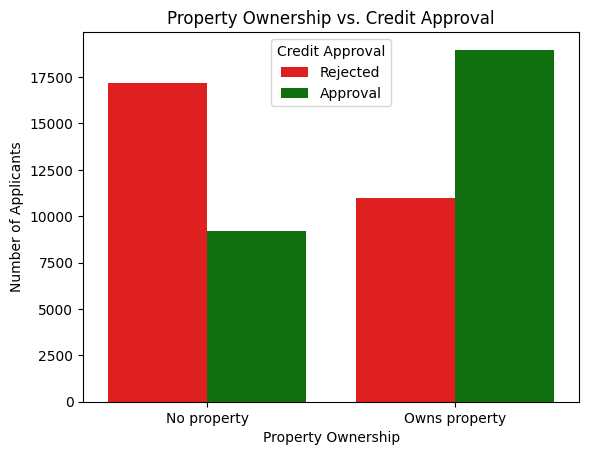

In [21]:
sns.countplot(x = "FLAG_OWN_REALTY",
              hue = "CREDIT_APPROVAL",
              data = balanced_train,
              palette = {0: "red", 1: "green"})
plt.title("Property Ownership vs. Credit Approval")
plt.xlabel("Property Ownership")
plt.ylabel("Number of Applicants")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
plt.xticks([0, 1], ["No property", "Owns property"])
plt.show()

##### Credit Approval vs. Income

C:\Users\wongz\AppData\Local\Temp\ipykernel_2104\1312344061.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x = "CREDIT_APPROVAL",


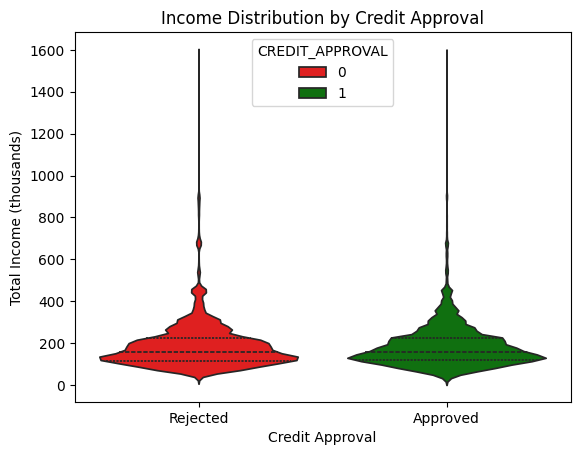

<Figure size 1000x600 with 0 Axes>

In [22]:
sns.violinplot(x = "CREDIT_APPROVAL", 
               y = "AMT_INCOME_TOTAL_THOUSANDS", 
               hue = "CREDIT_APPROVAL",
               data = balanced_train,
               inner = "quartile",
               scale = "count",
               palette = {0: "red", 1: "green"},
               legend = True)
plt.title("Income Distribution by Credit Approval")
plt.xlabel("Credit Approval")
plt.ylabel("Total Income (thousands)")
plt.xticks([0, 1], ["Rejected", "Approved"])
plt.figure(figsize = (10, 6))
plt.show()

##### Credit Approval vs. Income Type 


In [23]:
'''
NAME_INCOME_TYPE
Mapping for NAME_INCOME_TYPE:
    NAME_INCOME_TYPE  NAME_INCOME_TYPE_ENCODED
Commercial associate                         0
           Pensioner                         1
       State servant                         2
             Student                         3
             Working                         4

Mapping for NAME_HOUSING_TYPE:
  NAME_HOUSING_TYPE  NAME_HOUSING_TYPE_ENCODED
    Co-op apartment                          0
              House                          1
Municipal apartment                          2
   Office apartment                          3
   Rented apartment                          4
       With parents                          5

Mapping for OCCUPATION_TYPE:
      OCCUPATION_TYPE  OCCUPATION_TYPE_ENCODED
          Accountants                        0
       Cleaning staff                        1
        Cooking staff                        2
           Core staff                        3
              Drivers                        4
              
          Secretaries                       15
       Security staff                       16
 Waiters/barmen staff                       17
                  NaN                       18
'''

'\nNAME_INCOME_TYPE\nMapping for NAME_INCOME_TYPE:\n    NAME_INCOME_TYPE  NAME_INCOME_TYPE_ENCODED\nCommercial associate                         0\n           Pensioner                         1\n       State servant                         2\n             Student                         3\n             Working                         4\n\nMapping for NAME_HOUSING_TYPE:\n  NAME_HOUSING_TYPE  NAME_HOUSING_TYPE_ENCODED\n    Co-op apartment                          0\n              House                          1\nMunicipal apartment                          2\n   Office apartment                          3\n   Rented apartment                          4\n       With parents                          5\n\nMapping for OCCUPATION_TYPE:\n      OCCUPATION_TYPE  OCCUPATION_TYPE_ENCODED\n          Accountants                        0\n       Cleaning staff                        1\n        Cooking staff                        2\n           Core staff                        3\n              Driv

In [24]:
income_type_map = {
    0: "Commercial associate",
    1: "Pensioner",
    2: "State servant",
    3: "Student",
    4: "Working"
}

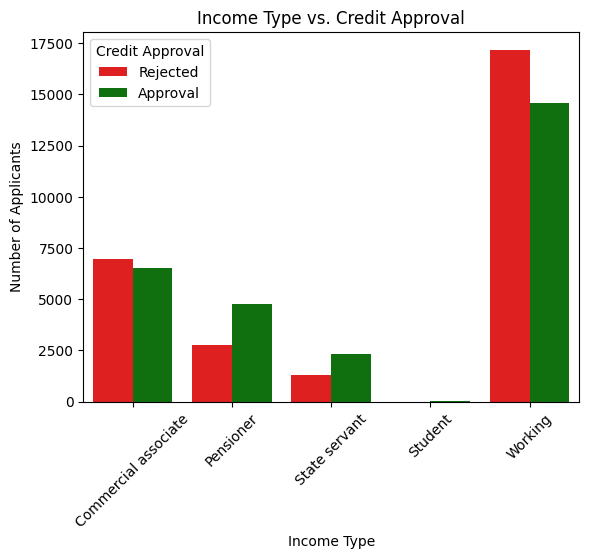

In [25]:
sns.countplot(x = "NAME_INCOME_TYPE_ENCODED",
              hue = "CREDIT_APPROVAL",
              data = balanced_train,
              palette = {0: "red", 1: "green"})
plt.title("Income Type vs. Credit Approval")
plt.xlabel("Income Type")
plt.ylabel("Number of Applicants")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
labels = [income_type_map[i] for i in sorted(income_type_map.keys())]
plt.xticks(ticks = range(len(labels)), labels = labels, rotation = 45)
plt.show()

##### Credit Approval vs. Housing Type

In [26]:
'''
Mapping for NAME_HOUSING_TYPE:
  NAME_HOUSING_TYPE  NAME_HOUSING_TYPE_ENCODED
    Co-op apartment                          0
              House                          1
Municipal apartment                          2
   Office apartment                          3
   Rented apartment                          4
       With parents                          5

'''

'\nMapping for NAME_HOUSING_TYPE:\n  NAME_HOUSING_TYPE  NAME_HOUSING_TYPE_ENCODED\n    Co-op apartment                          0\n              House                          1\nMunicipal apartment                          2\n   Office apartment                          3\n   Rented apartment                          4\n       With parents                          5\n\n'

In [27]:
housing_type_map = {
    0: "Co-op apartment",
    1: "House",
    2: "Municipal apartment",
    3: "Office apartment",
    4: "Rented apartment",
    5: "With parents"
}

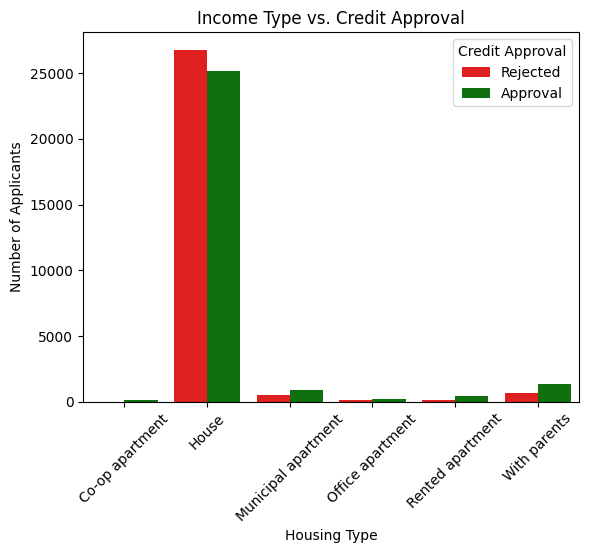

In [28]:
sns.countplot(x = "NAME_HOUSING_TYPE_ENCODED",
              hue = "CREDIT_APPROVAL",
              data = balanced_train,
              palette = {0: "red", 1: "green"})
plt.title("Income Type vs. Credit Approval")
plt.xlabel("Housing Type")
plt.ylabel("Number of Applicants")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
labels = [housing_type_map[i] for i in sorted(housing_type_map.keys())]
plt.xticks(ticks = range(len(labels)), labels = labels, rotation = 45)
plt.show()

##### Credit Approval vs. Mobile Phone Ownership 

In [29]:
# Frequency table to see the proportions within each car ownership group
pd.crosstab(balanced_train["FLAG_MOBIL"],
            balanced_train["CREDIT_APPROVAL"],
            normalize = "index")

CREDIT_APPROVAL,0,1
FLAG_MOBIL,,
1,0.5,0.5


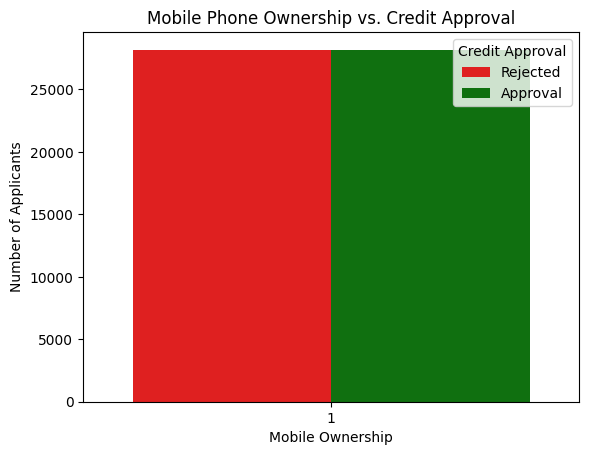

In [30]:
sns.countplot(x = "FLAG_MOBIL",
              hue = "CREDIT_APPROVAL",
              data = balanced_train,
              palette = {0: "red", 1: "green"})
plt.title("Mobile Phone Ownership vs. Credit Approval")
plt.xlabel("Mobile Ownership")
plt.ylabel("Number of Applicants")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
plt.show()

##### Credit Approval vs. Credit Risks

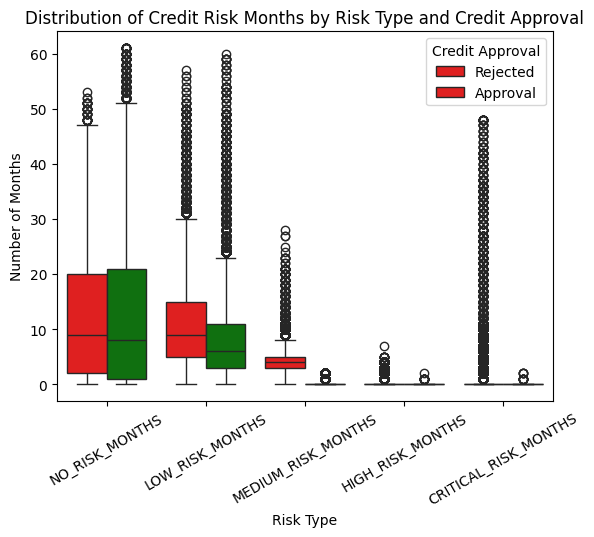

In [ ]:
# Scatter plot showing distribution of each risk type ("NO_RISK_MONTHS", "LOW_RISK_MONTHS", .. etc.) across "CREDIT_APPROVAL" groups 

# Melt to long format so each row represents per customer per credit risk type
credit_risk_cols = [
    "NO_RISK_MONTHS",
    "LOW_RISK_MONTHS",
    "MEDIUM_RISK_MONTHS",
    "HIGH_RISK_MONTHS",
    "CRITICAL_RISK_MONTHS"
]
melted = balanced_train.copy()
melted = melted.melt(
    id_vars = "CREDIT_APPROVAL",
    value_vars = credit_risk_cols,
    var_name = "RISK_TYPE",
    value_name = "NUMBER_OF_MONTHS"
)

# Plot scatter 
sns.boxplot(
    x = "RISK_TYPE",
    y = "NUMBER_OF_MONTHS",
    data = melted,
    hue = "CREDIT_APPROVAL",
    palette = {0: "red", 1: "green"})

plt.title("Distribution of Credit Risk Months by Risk Type and Credit Approval")
plt.xlabel("Risk Type")
plt.ylabel("Number of Months")
plt.legend(title = "Credit Approval", labels = ["Rejected", "Approval"])
plt.xticks(rotation = 30)
plt.show()